<a href="https://colab.research.google.com/github/Samarth-991/Yolov5-Tensorflow/blob/main/Yolov5_objectDetector_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os 
import time 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import nn
import cv2

In [2]:
def decode_image(image_path,shape=(256,256,3)):
		if os.path.isfile(image_path):
			img = image.load_img(image_path,target_size=shape)
			img = image.img_to_array(img)
			img = img.astype(np.float32)/255.0
			img = np.expand_dims(img,axis=0)
		else:
			sys.error("Image path is un-recognizable")
		return img

def draw_bbox(image, boxes, scores,scale):
    for box, score in zip(boxes, scores):
        if score > 0.2:
            coordinate = np.array(box[:4], dtype=np.int32)
            c1, c2 = (coordinate[0], coordinate[1]), (coordinate[2], coordinate[3])
            X1 = int(coordinate[0] * scale[1])
            Y1 = int(coordinate[1] * scale[0])
            X2 = int(coordinate[2] * scale[1])
            Y2 = int(coordinate[3] * scale[0])
            cv2.rectangle(test_image,(X1,Y1),(X2,Y2),(255,0,0),2)
            
    return image

In [3]:
# Load image for net
# !wget https://previews.123rf.com/images/zz3701/zz37011911/zz3701191100010/133648881-a-construction-worker-wearing-safety-helmet-driving-a-scooter-at-the-street-of-shenzhen-china-.jpg
# ! mv 133648881-a-construction-worker-wearing-safety-helmet-driving-a-scooter-at-the-street-of-shenzhen-china-.jpg test.jpg

In [4]:
model_weights = '/content/drive/MyDrive/Colab_Notebooks/Object-Detectors/models/model168.h5'
s = time.time()
model = nn.build_model(training=False)
model.load_weights(model_weights, True)
e = time.time()
print("Model loded in {:.2f} seconds".format(e-s))

Model loded in 5.67 seconds


(867, 1300, 3)
867 1300


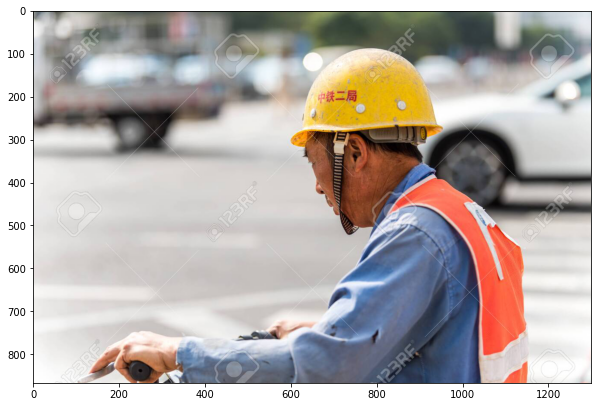

In [5]:
plt.figure(figsize=(10,10))
test_image = plt.imread('/content/test.jpg')
plt.imshow(test_image)
print(test_image.shape)
W,H = test_image.shape[:2]
print(W,H)

In [6]:
scale_W = W/256
scale_H = H/256
print(scale_W)
print(scale_H)
scale= (scale_W,scale_H)

3.38671875
5.078125


In [7]:
decoded_img = decode_image(image_path='/content/test.jpg')
print(decoded_img.shape)
# Model predict
s = time.time()
boxes, scores, _ = model.predict(decoded_img)
e = time.time()
print("image prediction took {:.2f} seconds".format(e-s))

(1, 256, 256, 3)
image prediction took 5.71 seconds


(867, 1300, 3)


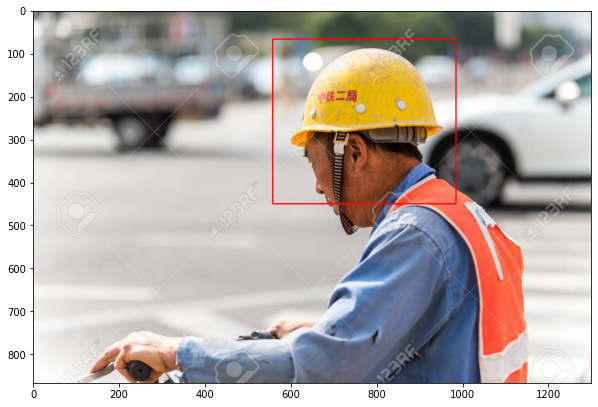

In [8]:
final_img = draw_bbox(test_image,boxes,scores,scale)
plt.figure(figsize=(10,10))
plt.imshow(final_img)
print(final_img.shape)
